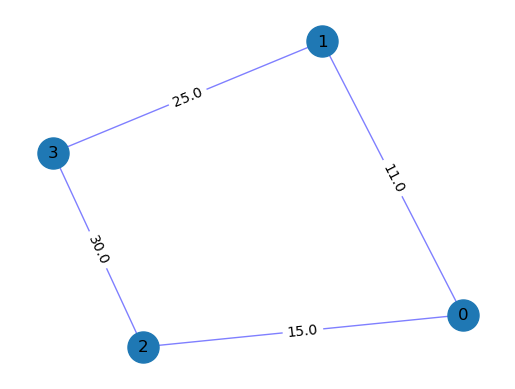

Shortest Path: [(0, 1), (1, 3), (3, 2), (2, 0)]
Shortest Path Length: 86.0


In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class AntColony:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        shortest_path_length = np.inf
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path, shortest_path_length)
            shortest_path, shortest_path_length = self.get_shortest(all_paths)
            self.pheromone *= self.decay
        return shortest_path, shortest_path_length

    def spread_pheromone(self, all_paths, n_best, shortest_path, shortest_path_length):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start))  # going back to where we started
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

    def get_shortest(self, all_paths):
        best_path = None
        best_path_length = np.inf
        for path, dist in all_paths:
            if dist < best_path_length:
                best_path_length = dist
                best_path = path
        return best_path, best_path_length

if __name__ == '__main__':
    # Define the distance matrix
    distances = np.array([[np.inf, 11, 15, 20],
                          [10, np.inf, 35, 25],
                          [20, 35, np.inf, 30],
                          [25, 25, 30, np.inf]])

    # Initialize the Ant Colony Optimization algorithm
    ant_colony = AntColony(distances, n_ants=3, n_best=2, n_iterations=200, decay=0.5)

    # Run the algorithm
    shortest_path, shortest_path_length = ant_colony.run()

    # Plot the graph
    G = nx.Graph()
    G.add_nodes_from(range(len(distances)))
    for i, j in shortest_path:
        G.add_edge(i, j, weight=distances[i, j])
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='b')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): distances[i, j] for i, j in G.edges()}, font_size=10, font_family="sans-serif")
    plt.axis('off')
    plt.show()

    print("Shortest Path:", shortest_path)
    print("Shortest Path Length:", shortest_path_length)
